In [244]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [245]:
# User input for Stock name , start and end date and also data_frequency

import datetime

def fetch_stock_params():
    ticker_symbol = input("Provide the ticker symbol (e.g., AAPL, TSLA, GOOGL): ").strip()
    
    while True:
        begin_date = input("Specify the beginning date (YYYY-MM-DD): ").strip()
        try:
            begin_date = datetime.datetime.strptime(begin_date, "%Y-%m-%d")
            break
        except ValueError:
            print("Incorrect date format. Please enter the date in YYYY-MM-DD format.")

    while True:
        finish_date = input("Provide the ending date (YYYY-MM-DD): ").strip()
        try:
            finish_date = datetime.datetime.strptime(finish_date, "%Y-%m-%d")
            if finish_date > begin_date:
                break
            else:
                print("End date must be after the start date.")
        except ValueError:
            print("Incorrect date format. Please enter the date in YYYY-MM-DD format.")

    
    data_frequencys = ["daily", "weekly", "monthly"]
    print(f"Available data_frequencys: {', '.join(data_frequencys)}")
    while True:
        data_frequency = input("Enter the data_frequency (daily/weekly/monthly): ").strip().lower()
        if data_frequency in data_frequencys:
            break
        else:
            print("Invalid data_frequency. Please choose from daily, weekly, or monthly.")
    
    return ticker_symbol, begin_date.strftime("%Y-%m-%d"), finish_date.strftime("%Y-%m-%d"), data_frequency


In [246]:
ticker_symbol, begin_date, finish_date, data_frequency = fetch_stock_params()

Enter the stock name (e.g., AAPL, TSLA, GOOGL):  GOOGL
Enter the start date (YYYY-MM-DD):  2010-1-1
Enter the end date (YYYY-MM-DD):  2020-12-31


Available timeframes: daily, weekly, monthly


Enter the timeframe (daily/weekly/monthly):  daily


In [247]:
#import data from yfinance library which user asked for

def download_historical_data(symbol, begin_date, finish_date, data_frequency):
    data_frequency_map = {
        "daily": "1d",
        "weekly": "1wk",
        "monthly": "1mo"
    }
    
    yf_interval = data_frequency_map.get(data_frequency)

    data = yf.download(tickers=symbol, start=begin_date, end=finish_date, interval=yf_interval)
    return data


In [248]:
data = download_historical_data(ticker_symbol, begin_date, finish_date, data_frequency)
data.head()

[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL
Date                                                             
2010-01-04  15.627781  15.696601  15.565196  15.632768   78169752
2010-01-05  15.558962  15.654961  15.497873  15.638504  120067812
2010-01-06  15.166740  15.605590  15.119365  15.605590  158988852
2010-01-07  14.813666  15.210128  14.777512  15.195166  256315428
2010-01-08  15.011148  15.041817  14.689241  14.761303  188783028

In [249]:
# plot all closing prices

def plot_closing_price(data, symbol):
    if 'Close' not in data.columns:
        print(f"No 'Close' column found in the data for {symbol}.")
        return
    
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label=f'{symbol} Closing Price', color='green')
    plt.title(f'{symbol} Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

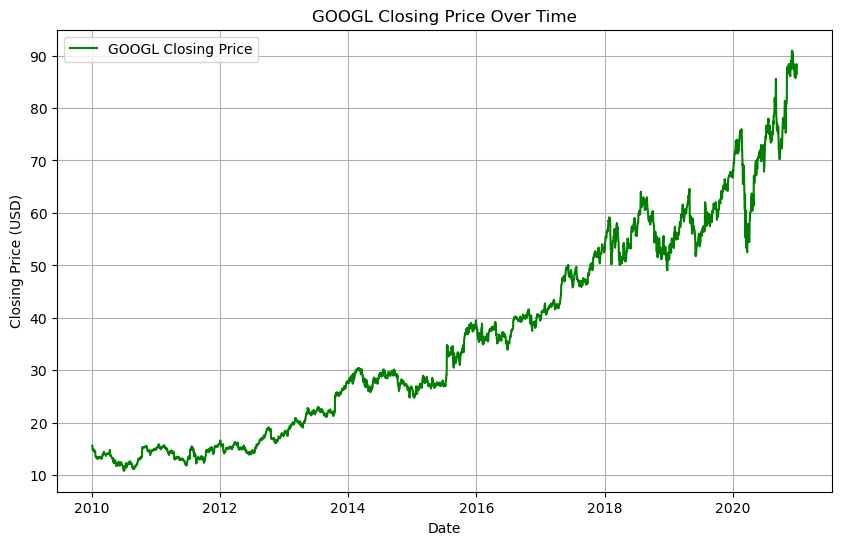

In [250]:
plot_closing_price(data, ticker_symbol)

In [251]:
# calculating a technical indicator MACD

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['EMA_Short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_Long'] = data['Close'].ewm(span=long_window, adjust=False).mean()

    data['MACD'] = data['EMA_Short'] - data['EMA_Long']

    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data

In [252]:
# calculating another tachnical indicator RSI

def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    return data


In [253]:
# Plotting MACD

def plot_macd(data, symbol):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['MACD'], label='MACD', color='blue')
    plt.plot(data.index, data['Signal_Line'], label='Signal Line', color='red')
    plt.title(f'{symbol} MACD')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()


In [254]:
# Plotting RSI

def plot_rsi(data, symbol):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'{symbol} RSI')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

In [255]:
calculate_macd(data).head()

Price           Close       High        Low       Open     Volume  EMA_Short  \
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL              
Date                                                                           
2010-01-04  15.627781  15.696601  15.565196  15.632768   78169752  15.627781   
2010-01-05  15.558962  15.654961  15.497873  15.638504  120067812  15.617193   
2010-01-06  15.166740  15.605590  15.119365  15.605590  158988852  15.547893   
2010-01-07  14.813666  15.210128  14.777512  15.195166  256315428  15.434935   
2010-01-08  15.011148  15.041817  14.689241  14.761303  188783028  15.369737   

Price        EMA_Long      MACD Signal_Line  
Ticker                                       
Date                                         
2010-01-04  15.627781  0.000000    0.000000  
2010-01-05  15.622683 -0.005490   -0.001098  
2010-01-06  15.588910 -0.041017   -0.009082  
2010-01-07  15.531484 -0.096549   -0.026575  
2010-01-08  15.492941 -0.123204   -0.045901

In [256]:
calculate_rsi(data).head()

Price           Close       High        Low       Open     Volume  EMA_Short  \
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL              
Date                                                                           
2010-01-04  15.627781  15.696601  15.565196  15.632768   78169752  15.627781   
2010-01-05  15.558962  15.654961  15.497873  15.638504  120067812  15.617193   
2010-01-06  15.166740  15.605590  15.119365  15.605590  158988852  15.547893   
2010-01-07  14.813666  15.210128  14.777512  15.195166  256315428  15.434935   
2010-01-08  15.011148  15.041817  14.689241  14.761303  188783028  15.369737   

Price        EMA_Long      MACD Signal_Line RSI  
Ticker                                           
Date                                             
2010-01-04  15.627781  0.000000    0.000000 NaN  
2010-01-05  15.622683 -0.005490   -0.001098 NaN  
2010-01-06  15.588910 -0.041017   -0.009082 NaN  
2010-01-07  15.531484 -0.096549   -0.026575 NaN  
2010-01-08  15.492941 -0.123204   -0.045901 NaN

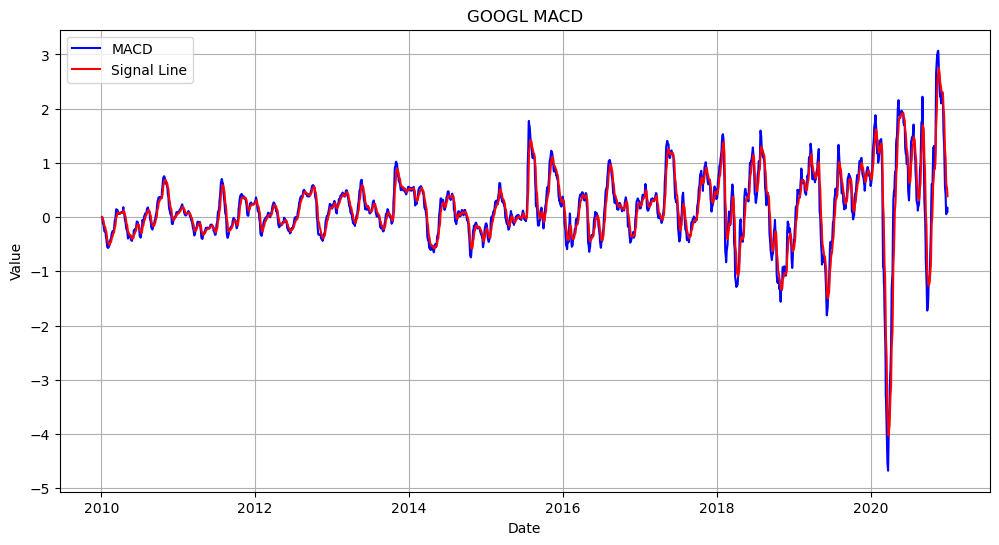

In [257]:
plot_macd(data, ticker_symbol)

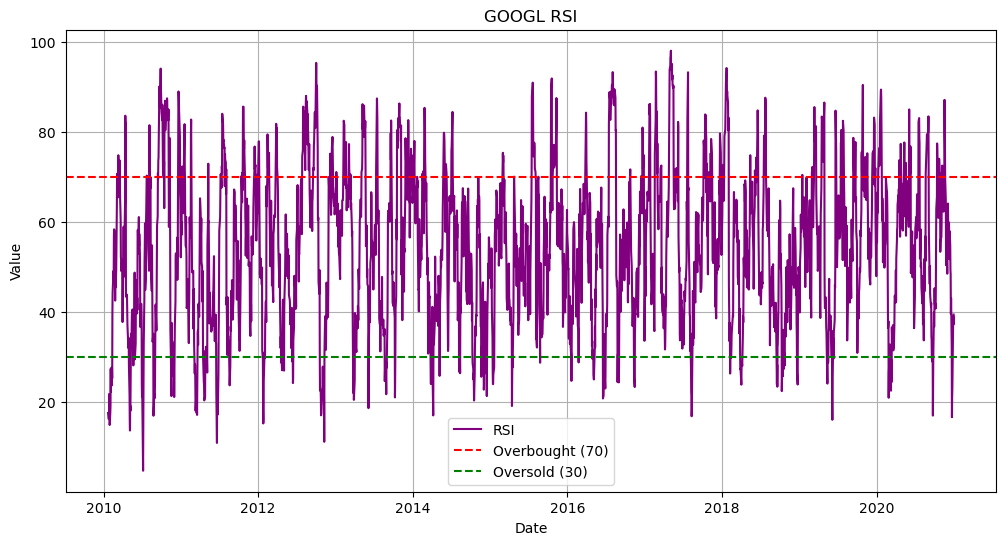

In [258]:
plot_rsi(data, ticker_symbol)

In [259]:
# Nomralizing data

from sklearn.preprocessing import MinMaxScaler

def normalize_data(df, columns):
    scaler = MinMaxScaler(feature_range=(0, 1))
    df[columns] = scaler.fit_transform(df[columns])
    return df

columns_to_normalize = ['Close', 'Volume', 'EMA_Short', 'EMA_Long', 'MACD', 'Signal_Line']

df_normalized = normalize_data(data, columns_to_normalize)

In [260]:
df_normalized.head()

Price          Close       High        Low       Open    Volume EMA_Short  \
Ticker         GOOGL      GOOGL      GOOGL      GOOGL     GOOGL             
Date                                                                        
2010-01-04  0.059398  15.696601  15.565196  15.632768  0.118092  0.054139   
2010-01-05  0.058538  15.654961  15.497873  15.638504  0.189947  0.054003   
2010-01-06  0.053638  15.605590  15.119365  15.605590  0.256697  0.053113   
2010-01-07  0.049227  15.210128  14.777512  15.195166  0.423613  0.051662   
2010-01-08  0.051694  15.041817  14.689241  14.761303  0.307795  0.050824   

Price       EMA_Long      MACD Signal_Line RSI  
Ticker                                          
Date                                            
2010-01-04  0.051591  0.603917    0.594421 NaN  
2010-01-05  0.051524  0.603208    0.594259 NaN  
2010-01-06  0.051077  0.598622    0.593082 NaN  
2010-01-07  0.050318  0.591454    0.590503 NaN  
2010-01-08  0.049808  0.588013    0.587653 NaN

In [261]:
# Creating sequence with sliding window of past 60 days

def create_sequences(data, feature_columns, target_column, time_steps=60):
    
    features = []
    targets = []
    for i in range(len(data) - time_steps):

        feature_window = data[feature_columns].iloc[i:i + time_steps].values
        
        target_value = data[target_column].iloc[i + time_steps]
        features.append(feature_window)
        targets.append(target_value)
    return np.array(features), np.array(targets)

In [262]:
feature_columns = ['Close', 'Volume', 'EMA_Short', 'EMA_Long', 'MACD', 'Signal_Line']
target_column = 'Close'

X, y = create_sequences(df_normalized, feature_columns, target_column)

In [263]:
# Designing LSTM model using depp learning framework using tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def create_lstm_model(input_shape, dropout_rate=0.2):
    model = Sequential()
    
    model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(64, activation='relu', return_sequences=False))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(1))  

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [264]:
# train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and compile the LSTM model
input_shape = (X_train.shape[1], X_train.shape[2])  
model = create_lstm_model(input_shape)

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 60, 64)              │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,265 (200.25 KB)

 Trainable params: 51,265 (200.25 KB)

 Non-trainable params: 0 (0.00 B)

In [265]:
# Training the model

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - loss: 0.0165 - mae: 0.0879 - val_loss: 0.0022 - val_mae: 0.0361
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0018 - mae: 0.0305 - val_loss: 0.0019 - val_mae: 0.0294
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 0.0015 - mae: 0.0273 - val_loss: 0.0077 - val_mae: 0.0811
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 0.0015 - mae: 0.0267 - val_loss: 0.0030 - val_mae: 0.0471
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0013 - mae: 0.0249 - val_loss: 0.0021 - val_mae: 0.0375
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.0011 - mae: 0.0227 - val_loss: 0.0013 - val_mae: 0.0272
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0011 - mae: 0.0223 - val_loss: 0.0013 - val_mae: 0.0262
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0011 - mae: 0.0226 - val_loss: 0.0014 - val_mae: 0.0282
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.

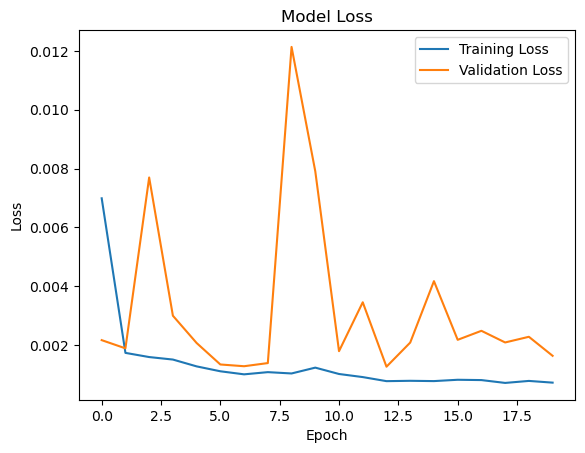

In [266]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



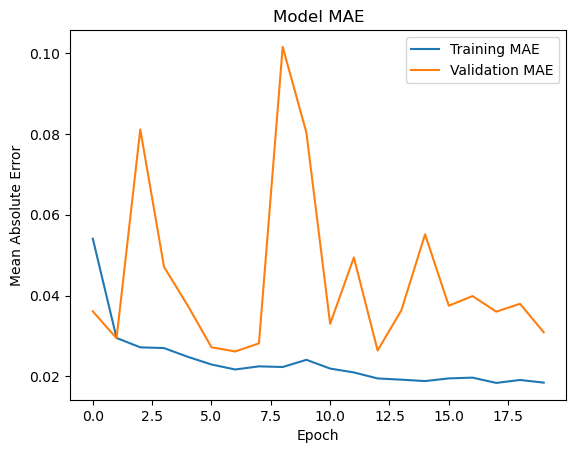

In [267]:
# Plot training & validation MAE (Mean Absolute Error)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()



In [268]:
def predict_next_units(model, data, feature_columns, time_steps, n_predictions):
    predictions = []

    # Start with the last sequence of data
    last_sequence = data[feature_columns].iloc[-time_steps:].values

    for _ in range(n_predictions):
        # Reshape the last sequence to match the model's input shape
        input_data = np.expand_dims(last_sequence, axis=0)

        # Predict the next value (assuming the target is a single value like 'Close')
        predicted_value = model.predict(input_data, verbose=0)[0][0]

        # Append the prediction
        predictions.append(predicted_value)

        # Create a new sequence by adding the predicted value and removing the oldest
        new_row = np.copy(last_sequence[-1])  # Copy the last row to use as a base
        new_row[0] = predicted_value  # Update the target column (e.g., 'Close') with the prediction

        last_sequence = np.append(last_sequence[1:], [new_row], axis=0)

    return predictions


In [269]:
# Parameters
n_predictions = 15
time_steps = X_train.shape[1]  # The sequence length used in training
feature_columns = ['Close', 'Volume', 'EMA_Short', 'EMA_Long', 'MACD', 'Signal_Line']  # Adjust to match your data

# Generate predictions
predicted_values = predict_next_units(model, df_normalized, feature_columns, time_steps, n_predictions)

# Denormalize predictions (if normalization was applied)
scaler = MinMaxScaler(feature_range=(0, 1))  # Replace with your actual scaler
scaler.fit(data[['Close']])  # Fit scaler on the original 'Close' column

predicted_values_denormalized = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

# Display predictions
print("Next 15 predicted values (normalized):", predicted_values)
print("Next 15 predicted values (denormalized):", predicted_values_denormalized)


Next 15 predicted values (normalized): [0.8897325, 0.88807356, 0.886055, 0.88391507, 0.881806, 0.8798102, 0.87796855, 0.876297, 0.8747966, 0.8734596, 0.8722744, 0.8712276, 0.8703053, 0.86949396, 0.868781]
Next 15 predicted values (denormalized): [[0.8897325 ]
 [0.88807356]
 [0.886055  ]
 [0.88391507]
 [0.881806  ]
 [0.8798102 ]
 [0.87796855]
 [0.876297  ]
 [0.8747966 ]
 [0.8734596 ]
 [0.8722744 ]
 [0.8712276 ]
 [0.8703053 ]
 [0.86949396]
 [0.868781  ]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step


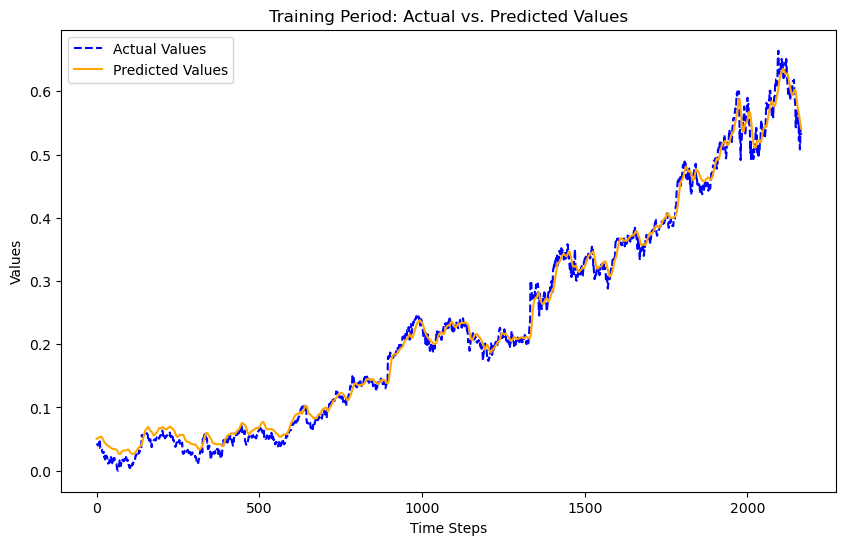

In [270]:
# Actual vs predicted graph

y_train_pred = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.plot(y_train, label="Actual Values", color="blue", linestyle="--")
plt.plot(y_train_pred, label="Predicted Values", color="orange")
plt.title("Training Period: Actual vs. Predicted Values")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


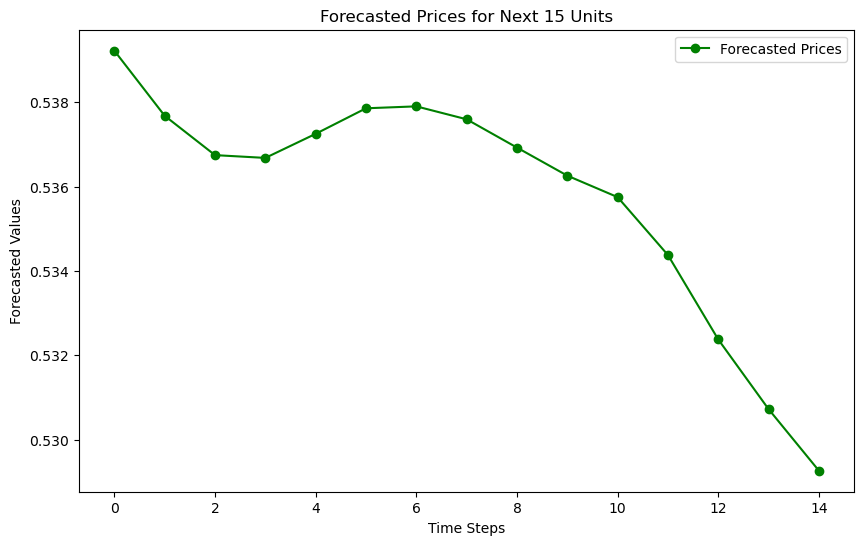

In [271]:
# forecasted graph

forecasted_prices = model.predict(X_test[:15])  # Replace [:15] if your test set is longer

plt.figure(figsize=(10, 6))
plt.plot(range(15), forecasted_prices, marker="o", color="green", label="Forecasted Prices")
plt.title("Forecasted Prices for Next 15 Units")
plt.xlabel("Time Steps")
plt.ylabel("Forecasted Values")
plt.legend()
plt.show()

In [272]:
# calculating R^2 using formula 

ss_res = np.sum((y_train - y_train_pred)**2)  # Residual sum of squares
ss_tot = np.sum((y_train - np.mean(y_train))**2)  # Total sum of squares
r2 = 1 - (ss_res / ss_tot)
print(f"R² Score for Training Period: {r2:.4f}")


R² Score for Training Period: 0.9933
